In [1]:
# Add the Pandas dependency.
import pandas as pd

In [2]:
# Files to load
file_to_load = "Resources/superstore_dataset2011-2015.csv"
# Read the CSV into a DataFrame
superstore_df = pd.read_csv(file_to_load, encoding='latin-1')
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [3]:
# Basic information
superstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [4]:
# Summary statistics of the data
superstore_df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [5]:
#Find the duplicates
superstore_df.duplicated().sum()

0

In [6]:
#unique values
superstore_df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [7]:
#Find null values
superstore_df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [8]:
# Find datatypes
superstore_df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [9]:
# Correlation matrix
superstore_df.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039078
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039078,-0.025449,0.768073,0.272649,-0.079056,0.354441,1.000000


<AxesSubplot:>

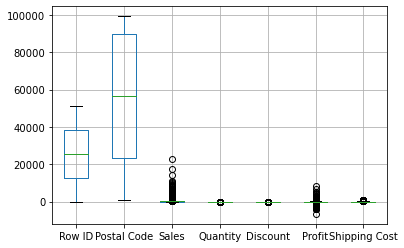

In [10]:
# Create a boxplot
superstore_df.boxplot()

In [11]:
# Check column names
superstore_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [12]:
# # Drop postal code columns as there are lots of null values
# superstore_df.drop(["Postal Code"], axis =1, inplace =True)

In [13]:
# # Ensure postal code column is dropped
# superstore_df.columns

In [14]:
# Change "Order Date" and "Ship Date" data types to datetime
superstore_df["Order Date"] = pd.to_datetime(superstore_df["Order Date"])
superstore_df["Ship Date"]= pd.to_datetime(superstore_df["Ship Date"])
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [15]:
# Extract year from order date column
superstore_df["Year"] = superstore_df["Order Date"].dt.year
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [16]:
# Extract month and year from order date column for further analysis
superstore_df['Month_Year'] = superstore_df["Order Date"].dt.to_period('M')
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month_Year
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [17]:
# Create discount_percentage column (Multiply discount by 100)
superstore_df["Discount_percentage"] = superstore_df["Discount"]*100
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month_Year,Discount_percentage
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01,0.0
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01,10.0
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01,0.0
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01,50.0
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01,10.0


In [18]:
superstore_df["Selling Price Per Unit"]= superstore_df.apply(lambda x: (x["Sales"] / x["Quantity"]), axis=1) 
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month_Year,Discount_percentage,Selling Price Per Unit
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,408.300,2,0.0,106.140,35.46,Medium,2011,2011-01,0.0,204.150
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,120.366,3,0.1,36.036,9.72,Medium,2011,2011-01,10.0,40.122
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,66.120,4,0.0,29.640,8.17,High,2011,2011-01,0.0,16.530
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,44.865,3,0.5,-26.055,4.82,High,2011,2011-01,50.0,14.955
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,113.670,5,0.1,37.770,4.70,Medium,2011,2011-01,10.0,22.734


In [19]:
# Create a new column for cost price per unit
superstore_df["Cost Price Per Unit"]= superstore_df.apply(lambda x: (x["Sales"]-x["Profit"])/x["Quantity"], axis=1) 
superstore_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month_Year,Discount_percentage,Selling Price Per Unit,Cost Price Per Unit
0,42433,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,2,0.0,106.140,35.46,Medium,2011,2011-01,0.0,204.150,151.08
1,22253,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,3,0.1,36.036,9.72,Medium,2011,2011-01,10.0,40.122,28.11
2,48883,HU-2011-1220,2011-01-01,2011-05-01,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,4,0.0,29.640,8.17,High,2011,2011-01,0.0,16.530,9.12
3,11731,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,3,0.5,-26.055,4.82,High,2011,2011-01,50.0,14.955,23.64
4,22255,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,5,0.1,37.770,4.70,Medium,2011,2011-01,10.0,22.734,15.18


In [20]:
# # Convert month_year column to string type
# superstore_df["Month_Year"] = superstore_df["Month_Year"].values.astype('datetime64[M]')
# superstore_df["Year"] = pd.to_datetime(superstore_df["Year"])

In [21]:
# Check the dtypes
superstore_df.dtypes

Row ID                             int64
Order ID                          object
Order Date                datetime64[ns]
Ship Date                 datetime64[ns]
Ship Mode                         object
Customer ID                       object
Customer Name                     object
Segment                           object
City                              object
State                             object
Country                           object
Postal Code                      float64
Market                            object
Region                            object
Product ID                        object
Category                          object
Sub-Category                      object
Product Name                      object
Sales                            float64
Quantity                           int64
Discount                         float64
Profit                           float64
Shipping Cost                    float64
Order Priority                    object
Year            

In [22]:
# Filter the dataset only for united states
us_sales_df = superstore_df[superstore_df['Country']=='United States']
us_sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Month_Year,Discount_percentage,Selling Price Per Unit,Cost Price Per Unit
7,34662,CA-2011-115161,2011-01-02,2011-03-02,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,...,2,0.15,3.4196,54.64,High,2011,2011-01,15.0,145.333,143.6232
27,37844,CA-2011-113880,2011-01-03,2011-05-03,Standard Class,VF-21715,Vicky Freymann,Home Office,Elmhurst,Illinois,...,6,0.30,-172.1172,70.05,High,2011,2011-01,30.0,105.686,134.3722
32,31454,CA-2011-104269,2011-01-03,2011-06-03,Second Class,DB-13060,Dave Brooks,Consumer,Seattle,Washington,...,2,0.20,51.4764,47.89,Medium,2011,2011-01,20.0,228.784,203.0458
34,39607,CA-2011-168312,2011-01-03,2011-07-03,Standard Class,GW-14605,Giulietta Weimer,Consumer,Houston,Texas,...,3,0.30,-43.0296,32.70,Medium,2011,2011-01,30.0,125.503,139.8462
36,39245,CA-2011-131009,2011-01-03,2011-05-03,Standard Class,SC-20380,Shahid Collister,Consumer,El Paso,Texas,...,6,0.30,0.0000,25.22,Medium,2011,2011-01,30.0,60.375,60.3750


In [23]:
us_sales_df.isnull().sum()

Row ID                    0
Order ID                  0
Order Date                0
Ship Date                 0
Ship Mode                 0
Customer ID               0
Customer Name             0
Segment                   0
City                      0
State                     0
Country                   0
Postal Code               0
Market                    0
Region                    0
Product ID                0
Category                  0
Sub-Category              0
Product Name              0
Sales                     0
Quantity                  0
Discount                  0
Profit                    0
Shipping Cost             0
Order Priority            0
Year                      0
Month_Year                0
Discount_percentage       0
Selling Price Per Unit    0
Cost Price Per Unit       0
dtype: int64

In [24]:
# Extract cleaned csv file for united states sales data to resources folder
us_sales_df.to_csv("Resources/cleaned_us_data.csv")

In [25]:
us_sales_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'Year', 'Month_Year',
       'Discount_percentage', 'Selling Price Per Unit', 'Cost Price Per Unit'],
      dtype='object')

In [26]:
# Drop postal code column from superstore_df as there are null values except for the united states
superstore_df.drop(["Postal Code"], axis =1, inplace =True)
superstore_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority', 'Year', 'Month_Year',
       'Discount_percentage', 'Selling Price Per Unit', 'Cost Price Per Unit'],
      dtype='object')

In [27]:
# Extract cleaned csv file to resources folder
superstore_df.to_csv("Resources/cleaned_superstore_master.csv")

In [28]:
# import csv
# import json

# csvfile = open("Resources/cleaned_superstore_master.csv", 'r', encoding="utf8")
# jsonfile = open('superstore_dataset2011-2015.json', 'w')

# fieldnames = ('Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
#        'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
#         'Market', 'Region', 'Product ID', 'Category',
#        'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
#        'Profit', 'Shipping Cost', 'Order Priority')
# reader = csv.DictReader( csvfile, fieldnames)
# out = json.dumps( [ row for row in reader ] )
# jsonfile.write(out)

In [29]:
# Check the unique values in year column
us_sales_df["Year"].unique()

array([2011, 2012, 2013, 2014], dtype=int64)